In [ ]:
import json
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("rocket", as_cmap=True)

## Load data from kaggle 

In [ ]:
!mkdir ~/

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json.kaggle
!touch ~/.kaggle/kaggle.json

!kaggle datasets download -d marklvl/bike-sharing-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


## Extract all files from zip file

In [ ]:
with zntall('dataset')


## Load dataset
[Bike Sharing in Washington D.C. Dataset](https://www.kaggle.com/marklvl/bike-sharing-dataset?select=hour.csv)

In [ ]:
df = pd.read_csv('/content/dataset/day.csv') 

## Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# convert the 'dteday' column to datetime format
df['dteday']= pd.to_datetime(df['dteday'])
 
# Check the format of 'dteday' column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

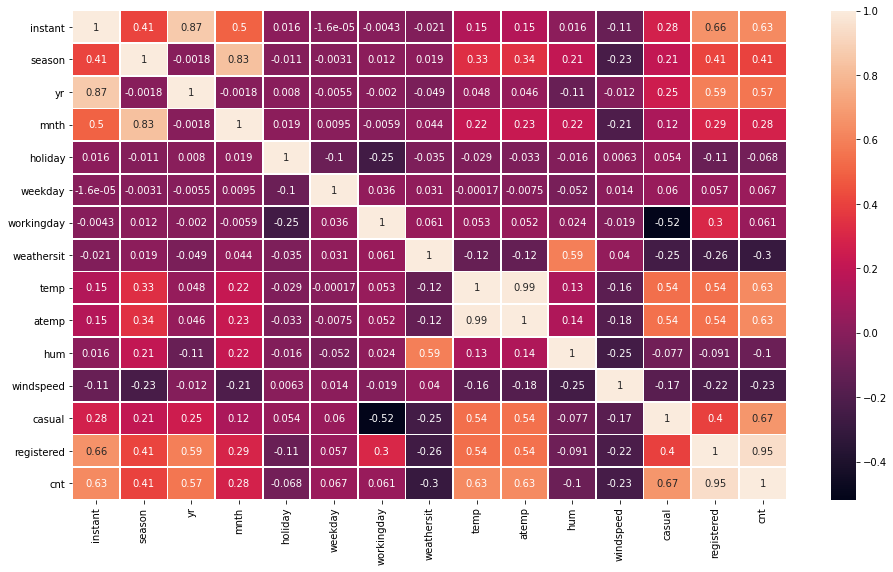

In [ ]:
# create correlation matrix using heatmap
fig, ax = plt.subplots(figsize=(16,9)) # create figure with figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.8, ax=ax);


##### From the above heatmap can summaries that:
- The **`casual`** has a strong negative correlation with **`workingday`** and strong positive correlation with **`cnt`**.
- There is negative correlation between **`workingday`** and **`holiday`**. And that we expected.
- Relation between **`temp`** and **`cnt`** is postive.

#### **Is there a relation between count of rents and temperature?**

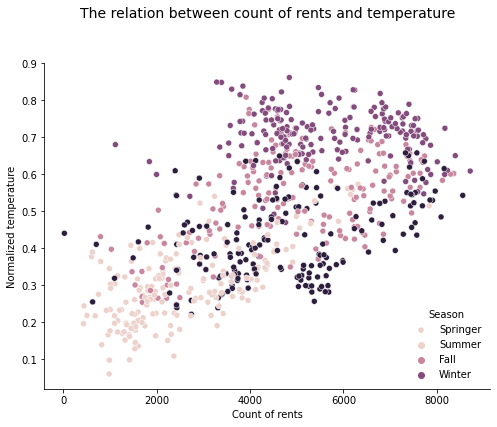

In [ ]:
fig, ax = plt.subplots(figsize=(8,6)) # create figure with size (8,6)

g1 = sns.scatterplot(data = df, x='cnt',y='temp',hue='season') # create scatter plot 
sns.despine(top=True, right=True, left=False, bottom=False) # remove border
plt.legend(title='Season', loc='best', labels=['Springer', 'Summer', 'Fall', 'Winter'], frameon=False) # add legend labels

# axis lablel 
plt.xlabel("Count of rents")
plt.ylabel("Normalized temperature")

# plot title 
# add the title, title size, and the distance between title and plot
plt.title("The relation between count of rents and temperature", size=14, y=1.12) 

plt.show(g1) # show the scatter plot

#### **Is there a relation between count of rents and humidity?**

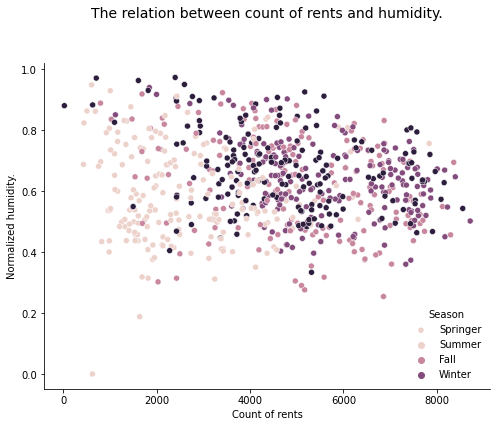

In [ ]:
fig, ax = plt.subplots(figsize=(8,6)) # create figure with size (8,6)

g2 = sns.scatterplot(data = df, x='cnt',y='hum',hue='season') # create scatter plot 
sns.despine(top=True, right=True, left=False, bottom=False) # remove border
plt.legend(title='Season', loc='best', labels=['Springer', 'Summer', 'Fall', 'Winter'], frameon=False) # add legend labels

# axis lablel 
plt.xlabel("Count of rents")
plt.ylabel("Normalized humidity.")

# plot title 
# add the title, title size, and the distance between title and plot
plt.title("The relation between count of rents and humidity.", size=14, y=1.12) 

plt.show(g2) # show the scatter plot

### **How does the weather affect renting a bike?**


##### **Weathersit Classes**
1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


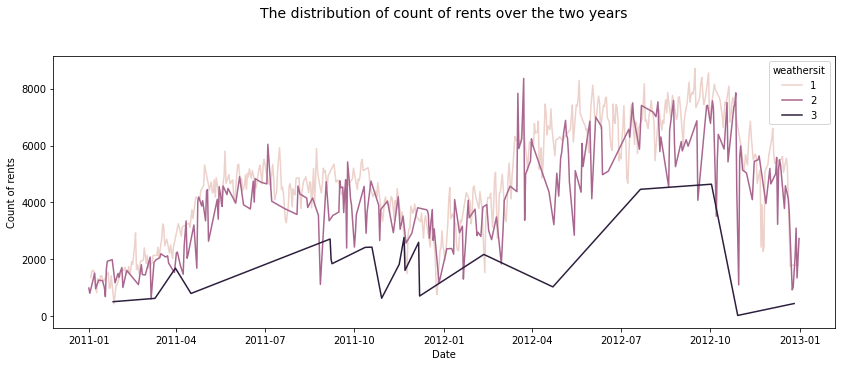

In [ ]:
fig, ax = plt.subplots(figsize=(14,5)) # create figure with figsize in inches
g3 = sns.lineplot(data=df, x="dteday", y="cnt",hue="weathersit");

# axis lablel 
plt.xlabel("Date")
plt.ylabel("Count of rents")

# plot title 
# add the title, title size, and the distance between title and plot
plt.title("The distribution of count of rents over the two years", size=14, y=1.12)
plt.show(g3);



**As see in the line plot most of users rent bike when weathersit is class 1 (that's mean the weather is clear, few clouds, partly cloudy, partly cloudy)**


### **In which season the number of the rents increased?**

**Note:** 1:springer, 2:summer, 3:fall, 4:winter

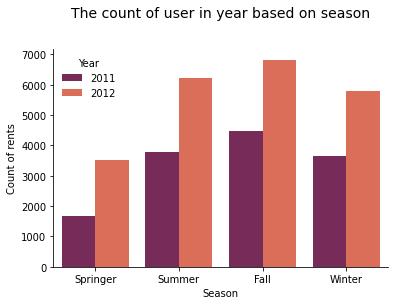

In [ ]:
g4 = sns.barplot(data=df,x="season",  y="cnt", hue="yr", palette="rocket",  ci=None)
sns.despine(top=True, right=True, left=False, bottom=False) # remove border

plt.ylabel('Count of rents')
plt.xlabel('Season')
plt.title("The count of user in year based on season", size=14, y=1.12)

plt.xticks([0,1,2,3],['Springer', 'Summer', 'Fall', 'Winter'])

plt.legend(title='Year', loc='best', labels=['2011', '2012'], frameon=False)
plt.show(g4);

As shows on the figure, the number of rents increse on Full.

### All plots

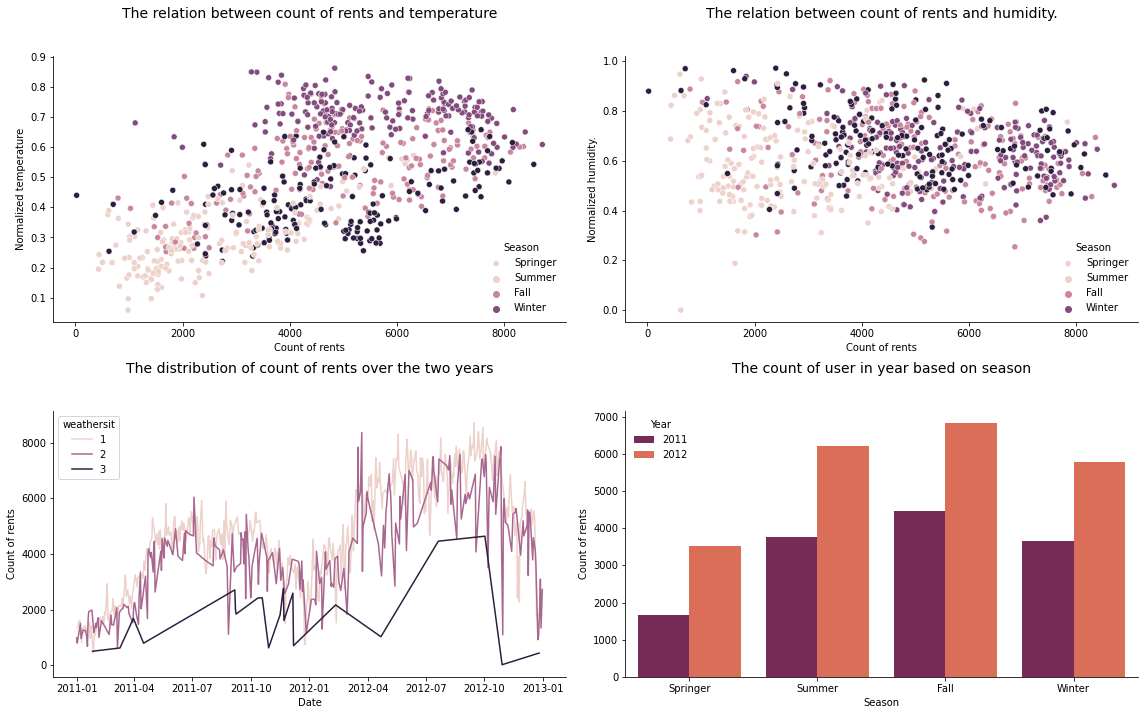

In [ ]:
# Create 2 subplots. 2 plots per row and 2 plots per column

f, axes = plt.subplots(2, 2, figsize=(16,10))

# plot 1:

g1 = sns.scatterplot(data = df, x='cnt',y='temp',hue='season'  , ax=axes[0,0]) # create scatter plot 
sns.despine(top=True, right=True, left=False, bottom=False) # remove border
axes[0,0].legend(title='Season', loc='best', labels=['Springer', 'Summer', 'Fall', 'Winter'], frameon=False) # add legend labels

# axis lablel 
axes[0,0].set_xlabel("Count of rents")
axes[0,0].set_ylabel("Normalized temperature")

# plot title 
# add the title, title size, and the distance between title and plot
axes[0,0].set_title("The relation between count of rents and temperature", size=14, y=1.12) 


# plot 2:

 
g2 = sns.scatterplot(data = df, x='cnt',y='hum',hue='season', ax=axes[0,1]) # create scatter plot 
sns.despine(top=True, right=True, left=False, bottom=False) # remove border
axes[0,1].legend(title='Season', loc='best', labels=['Springer', 'Summer', 'Fall', 'Winter'], frameon=False) # add legend labels

# axis lablel 
axes[0,1].set_xlabel("Count of rents")
axes[0,1].set_ylabel("Normalized humidity.")

# plot title 
# add the title, title size, and the distance between title and plot
axes[0,1].set_title("The relation between count of rents and humidity.", size=14, y=1.12) 

#plt.show(g2) # show the scatter plot

# plot 3:

g3 = sns.lineplot(data=df, x="dteday", y="cnt",hue="weathersit", ax=axes[1,0]);

# axis lablel 
axes[1,0].set_xlabel("Date")
axes[1,0].set_ylabel("Count of rents")

# plot title 
# add the title, title size, and the distance between title and plot
axes[1,0].set_title("The distribution of count of rents over the two years", size=14, y=1.12)


# plot: 4


g4 = sns.barplot(data=df,x="season",  y="cnt", hue="yr", palette="rocket",  ci=None, ax=axes[1,1])
sns.despine(top=True, right=True, left=False, bottom=False) # remove border

plt.ylabel('Count of rents')
plt.xlabel('Season')
axes[1,1].set_title("The count of user in year based on season", size=14, y=1.12)

plt.xticks([0,1,2,3],['Springer', 'Summer', 'Fall', 'Winter'])

plt.legend(title='Year', loc='best', labels=['2011', '2012'], frameon=False);



plt.tight_layout() # To increase space between plots to prevent label overlap
plt.show()